<h1>GESIS Summer School in Survey Methodology 2018:<br> Meta-Analysis in Social Research and Survey Methodology<span class="tocSkip"></span></h1>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preliminaries" data-toc-modified-id="Preliminaries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preliminaries</a></span></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise</a></span></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise</a></span></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise</a></span></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercise</a></span></li></ul></div>

## Preliminaries

Please do not touch anything in this section, otherwise this notebook might not work properly. You have been warned! Also, if you have no clue what you are staring at, please consult our [Preface chapter](1-1_preface.ipynb).

In [12]:
source("run_me_first.R")

## Exercise

In this exercise, we want you to conduct mixed effect meta-regression to attempt to explain effect size
heterogeneity. 

Load the data into R and then run a simple (unconditional) mixed effect meta-regression.

In [13]:
## Solution.
library(metafor)
dat.bcg <- escalc(measure = "RR", ai = tpos, bi = tneg, ci = cpos, di = cneg, data = dat.bcg)
fit.0 <- rma(yi = yi, vi = vi, method = "REML", data = dat.bcg)
fit.0


Random-Effects Model (k = 13; tau^2 estimator: REML)

tau^2 (estimated amount of total heterogeneity): 0.3132 (SE = 0.1664)
tau (square root of estimated tau^2 value):      0.5597
I^2 (total heterogeneity / total variability):   92.22%
H^2 (total variability / sampling variability):  12.86

Test for Heterogeneity: 
Q(df = 12) = 152.2330, p-val < .0001

Model Results:

estimate      se     zval    pval    ci.lb    ci.ub     
 -0.7145  0.1798  -3.9744  <.0001  -1.0669  -0.3622  ***

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


## Exercise

In a next step we are wondering if the moderator variable `ablat` can explain heterogeneity in the effect size
distribution. `ablat` denotes the absolute [latitude](https://en.wikipedia.org/wiki/Geographic_coordinate_system) (Wikipedia article). The effect of latitude on the vaccine can be assumed as follows:

> "Latitude accounts for variation in rainfall, humidity, environmental mycobacteria that may produce natural immunity, temperature, and other factors that may have biological implications for vaccine efficacy. Preparation of the live vaccine requires refrigeration; unrefrigerated, it would spoil more quickly in warmer temperatures. Furthermore, direct
exposure of the vaccine to sunlight may reduce counts of live bacteria" (Berkey et al. 1995: 396).
 
In order to investigate the effect of `ablat`, run a mixed meta-regression model. 

Check our `metafor` introduction slides for help with the code for mixed effects models. Come up with a meaningful
interpretation.

Tip: `rma(y, v, mods= ~ x_1 + ..., data = dataset)`


Mixed-Effects Model (k = 13; tau^2 estimator: REML)

tau^2 (estimated amount of residual heterogeneity):     0.076 (SE = 0.059)
tau (square root of estimated tau^2 value):             0.276
I^2 (residual heterogeneity / unaccounted variability): 68.39%
H^2 (unaccounted variability / sampling variability):   3.16
R^2 (amount of heterogeneity accounted for):            75.62%

Test for Residual Heterogeneity: 
QE(df = 11) = 30.733, p-val = 0.001

Test of Moderators (coefficient(s) 2): 
QM(df = 1) = 16.357, p-val < .001

Model Results:

         estimate     se    zval   pval   ci.lb   ci.ub     
intrcpt     0.251  0.249   1.009  0.313  -0.237   0.740     
ablat      -0.029  0.007  -4.044  <.001  -0.043  -0.015  ***

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


trial,author,year,tpos,tneg,cpos,cneg,ablat,alloc,yi,vi
1,Aronson,1948,4,119,11,128,44,random,-0.88931133,0.325584765
2,Ferguson & Simes,1949,6,300,29,274,55,random,-1.58538866,0.194581121
3,Rosenthal et al,1960,3,228,11,209,42,random,-1.34807315,0.415367965
4,Hart & Sutherland,1977,62,13536,248,12619,52,random,-1.44155119,0.020010032
5,Frimodt-Moller et al,1973,33,5036,47,5761,13,alternate,-0.21754732,0.051210172
6,Stein & Aronson,1953,180,1361,372,1079,44,alternate,-0.78611559,0.006905618
7,Vandiviere et al,1973,8,2537,10,619,19,random,-1.62089822,0.223017248
8,TPT Madras,1980,505,87886,499,87892,13,random,0.01195233,0.003961579
9,Coetzee & Berjak,1968,29,7470,45,7232,27,random,-0.46941765,0.056434210
10,Rosenthal et al,1961,17,1699,65,1600,42,systematic,-1.37134480,0.073024794


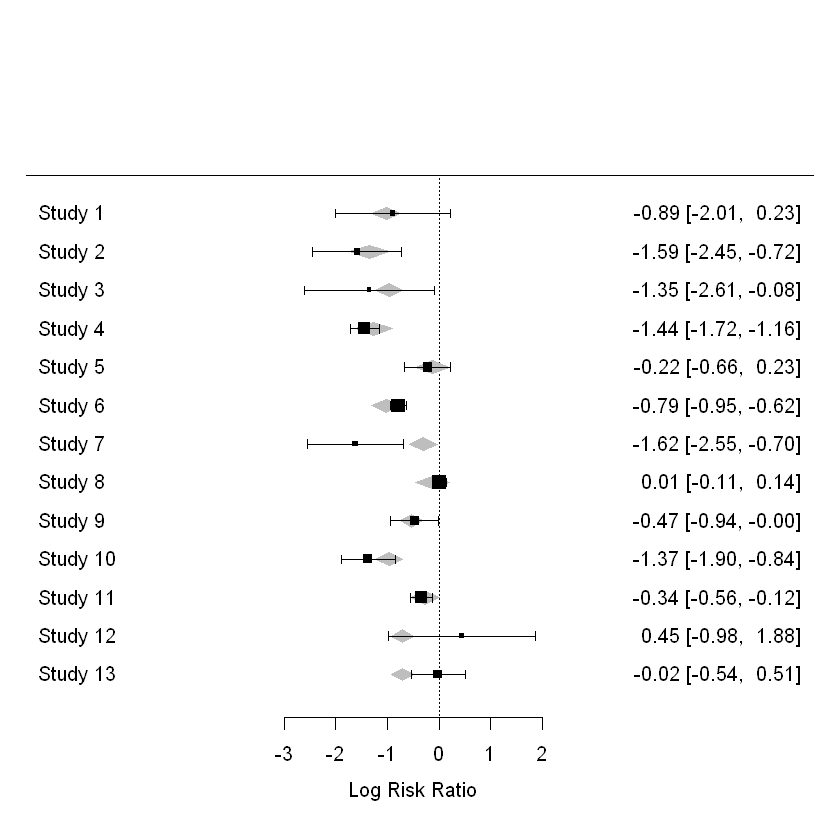

In [3]:
## Solution.
library(metafor)
dat.bcg <- escalc(measure = "RR", ai = tpos, bi = tneg, ci = cpos, di = cneg, data = dat.bcg)
res.abl <- (rma(yi ~ ablat, vi, data = dat.bcg, digits = 3) )
res.abl

forest(res.abl)
dat.bcg

In [15]:
## Solution.
## This moderator has negative, statistically significant effect. That is, the colder 
## (more north or south,  it is the absolute value), the better the vaccine works. 
## At 0° (intercept), the effect is positive ($b_0 = 0.251$)

In [28]:
## Solution.
## The value for R^2 ("R^2 (amount of heterogeneity accounted for):") can be manually 
## calculated as follows:
(fit.0$tau2 - res.abl$tau2 )/ fit.0$tau2 

[1] 0.7562448

## Exercise

Next we were wondering what happens if transform ablat into a grouped variable named
ablat_gr. Note that we need to define a predictor as a `factor` variable. There are different approaches of creating factor variables in R:

-  If you are going to recode a continuous variable, you might want to use the `recode` command from the car package. After doing that, you have to convert the newly created variable to a factor variable by using the factor() command:

In [16]:
table(dat.bcg$ablat)


13 18 19 27 33 42 44 52 55 
 2  1  1  1  2  2  2  1  1 

In [1]:
install.packages("car")
library(car)
dat.bcg$ablat_gr <- recode(dat.bcg$ablat, "0:33 = '[0,34)'; 24:90 = '[34,90)'")
dat.bcg$ablat_gr <- factor(dat.bcg$ablat_gr)
table(dat.bcg$ablat_gr)

also installing the dependencies 'minqa', 'nloptr', 'Rcpp', 'RcppEigen', 'lme4', 'SparseM', 'MatrixModels', 'MASS', 'mgcv', 'nnet', 'pbkrtest', 'quantreg'



package 'minqa' successfully unpacked and MD5 sums checked
package 'nloptr' successfully unpacked and MD5 sums checked
package 'Rcpp' successfully unpacked and MD5 sums checked
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'lme4' successfully unpacked and MD5 sums checked
package 'SparseM' successfully unpacked and MD5 sums checked
package 'MatrixModels' successfully unpacked and MD5 sums checked
package 'MASS' successfully unpacked and MD5 sums checked
package 'mgcv' successfully unpacked and MD5 sums checked
package 'nnet' successfully unpacked and MD5 sums checked
package 'pbkrtest' successfully unpacked and MD5 sums checked
package 'quantreg' successfully unpacked and MD5 sums checked
package 'car' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	D:\TEMP\RtmpEJGdKI\downloaded_packages


ERROR: Error in is.factor(var): Objekt 'dat.bcg' nicht gefunden


- If you just want to convert a given variable (which will R treat as a continuous variable) to a factor variable, you should use the `factor()` command, e.g. `factor(dat.bcg$ablat)` (note: your new factor variable will have 26 levels).

This variable indicates if the study took place between 34 degrees latitude and the north/south pole (remember, it is the absolute latitude).

In [18]:
## Solution.
mdl_grouped <- rma(yi ~ ablat_gr, vi, data = dat.bcg, digits = 3)
summary(mdl_grouped)


Mixed-Effects Model (k = 13; tau^2 estimator: REML)

  logLik  deviance       AIC       BIC      AICc  
  -7.073    14.146    20.146    21.339    23.574  

tau^2 (estimated amount of residual heterogeneity):     0.084 (SE = 0.063)
tau (square root of estimated tau^2 value):             0.289
I^2 (residual heterogeneity / unaccounted variability): 70.82%
H^2 (unaccounted variability / sampling variability):   3.43
R^2 (amount of heterogeneity accounted for):            73.31%

Test for Residual Heterogeneity: 
QE(df = 11) = 41.789, p-val < .001

Test of Moderators (coefficient(s) 2): 
QM(df = 1) = 17.145, p-val < .001

Model Results:

                 estimate     se    zval   pval   ci.lb   ci.ub     
intrcpt            -0.273  0.145  -1.887  0.059  -0.557   0.011    .
ablat_gr[34,90)    -0.920  0.222  -4.141  <.001  -1.356  -0.485  ***

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


If you want to change the reference level, you can use the `relevel()` command. So, for instance, if you want to use level `[0,34)` as new reference category:

In [19]:
mdl_grouped <- rma(yi ~ relevel(ablat_gr, ref = "[34,90)"), vi, data = dat.bcg, digits = 3)
summary(mdl_grouped)


Mixed-Effects Model (k = 13; tau^2 estimator: REML)

  logLik  deviance       AIC       BIC      AICc  
  -7.073    14.146    20.146    21.339    23.574  

tau^2 (estimated amount of residual heterogeneity):     0.084 (SE = 0.063)
tau (square root of estimated tau^2 value):             0.289
I^2 (residual heterogeneity / unaccounted variability): 70.82%
H^2 (unaccounted variability / sampling variability):   3.43
R^2 (amount of heterogeneity accounted for):            73.31%

Test for Residual Heterogeneity: 
QE(df = 11) = 41.789, p-val < .001

Test of Moderators (coefficient(s) 2): 
QM(df = 1) = 17.145, p-val < .001

Model Results:

                                          estimate     se    zval   pval
intrcpt                                     -1.194  0.169  -7.075  <.001
relevel(ablat_gr, ref = "[34,90)")[0,34)     0.920  0.222   4.141  <.001
                                           ci.lb   ci.ub     
intrcpt                                   -1.524  -0.863  ***
relevel(ablat_

If you don’t like that your output looks kind of ugly because the relevel() command is included, you could generate a new variable:

In [20]:
dat.bcg$ablat_gr2 <- relevel(dat.bcg$ablat_gr, ref = "[34,90)")
head(dat.bcg)

trial,author,year,tpos,tneg,cpos,cneg,ablat,alloc,yi,vi,ablat_gr,ablat_gr2
1,Aronson,1948,4,119,11,128,44,random,-0.8893113,0.325584765,"[34,90)","[34,90)"
2,Ferguson & Simes,1949,6,300,29,274,55,random,-1.5853887,0.194581121,"[34,90)","[34,90)"
3,Rosenthal et al,1960,3,228,11,209,42,random,-1.3480731,0.415367965,"[34,90)","[34,90)"
4,Hart & Sutherland,1977,62,13536,248,12619,52,random,-1.4415512,0.020010032,"[34,90)","[34,90)"
5,Frimodt-Moller et al,1973,33,5036,47,5761,13,alternate,-0.2175473,0.051210172,"[0,34)","[0,34)"
6,Stein & Aronson,1953,180,1361,372,1079,44,alternate,-0.7861156,0.006905618,"[34,90)","[34,90)"


In [21]:
mdl_grouped <- rma(yi ~ ablat_gr2, vi, data = dat.bcg, digits = 3)
summary(mdl_grouped)


Mixed-Effects Model (k = 13; tau^2 estimator: REML)

  logLik  deviance       AIC       BIC      AICc  
  -7.073    14.146    20.146    21.339    23.574  

tau^2 (estimated amount of residual heterogeneity):     0.084 (SE = 0.063)
tau (square root of estimated tau^2 value):             0.289
I^2 (residual heterogeneity / unaccounted variability): 70.82%
H^2 (unaccounted variability / sampling variability):   3.43
R^2 (amount of heterogeneity accounted for):            73.31%

Test for Residual Heterogeneity: 
QE(df = 11) = 41.789, p-val < .001

Test of Moderators (coefficient(s) 2): 
QM(df = 1) = 17.145, p-val < .001

Model Results:

                 estimate     se    zval   pval   ci.lb   ci.ub     
intrcpt            -1.194  0.169  -7.075  <.001  -1.524  -0.863  ***
ablat_gr2[0,34)     0.920  0.222   4.141  <.001   0.485   1.356  ***

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


## Exercise

Use `rma(y, v, mods = ~x_1 + ... - 1, data = dataset)` (`-1` removes the intercept) to obtain the weighted average effect sizes and standard errors for each group of ablat_gr . 

**IMPORTANT: Do not use the Q values!**
    
Which group has the largest effect? And, more importantly, what does that mean?

In [22]:
## Solution.
mdl3_grouped <- rma(yi ~ ablat_gr - 1, vi, data = dat.bcg, digits = 3)
summary(mdl3_grouped)



## - a negative value means that the vaccine indeed works.
## - 0 means there is no effect at all, yi > 0 means the vaccine is harmful.
###  - vaccine works better in cntries for lattitudes bw. 34 and 90 



Mixed-Effects Model (k = 13; tau^2 estimator: REML)

  logLik  deviance       AIC       BIC      AICc  
  -7.073    14.146    20.146    21.339    23.574  

tau^2 (estimated amount of residual heterogeneity):     0.084 (SE = 0.063)
tau (square root of estimated tau^2 value):             0.289
I^2 (residual heterogeneity / unaccounted variability): 70.82%
H^2 (unaccounted variability / sampling variability):   3.43

Test for Residual Heterogeneity: 
QE(df = 11) = 41.789, p-val < .001

Test of Moderators (coefficient(s) 1:2): 
QM(df = 2) = 53.612, p-val < .001

Model Results:

                 estimate     se    zval   pval   ci.lb   ci.ub     
ablat_gr[0,34)     -0.273  0.145  -1.887  0.059  -0.557   0.011    .
ablat_gr[34,90)    -1.194  0.169  -7.075  <.001  -1.524  -0.863  ***

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 
